# Basic introduction to Python

This document gives a very bried and basic introduction to the most used programming language in astrophyical and cosmological research: Python. It also gives an illustration of a powerful tool tightly linked to Python: the *Jupyter notebooks*, which are interactive documents were you can easily write, visualise, share and document python codes.

You can download this notebook [here](https://obswww.unige.ch/lastro/misc/TP4/doc/notebooks/intro_python.ipynb).

### `python 2` vs `python 3`
Use **Python 3.x** (e.g. the last stable release Python 3.11), instead of the completely deprecated Python 2.x. As of 2023 there is no reason to use Python 2.

### Going further
The practical works will certainly require more python knowledge than what is introduced here. For a additional examples, please take a look at these general [learnpython tutorials](https://www.learnpython.org), and this [LASTRO Python 3 tutorial](http://obswww.unige.ch/doc/rst/Tutorials/python3.html) focused on tools often employed in astrophysics.

## Environments

Given that different projects require different versions of Python (and of its libraries), it is standard practise to use Python inside an **environment**.
An environment is "a directory that contains a specific collection of packages that you have installed" ([Conda docs](https://docs.conda.io/projects/conda/en/latest/user-guide/concepts/environments.html)).
In practice, an environment is an encapsulated system, where you can install any Python version and package without affecting the rest of your system.
Not using environments often leads to unusable Python installations due to conflicting versions.

Thus, we recommend that you create an environment and install Python in that environment.

## Conda, Miniconda, and Micromamba

We use [Conda](https://docs.anaconda.com/free/anaconda/install/index.html) to create and manage environments.
By default, Conda comes with a couple hundred packages preinstalled, which can take up to 5Gb of disk space. 
If you prefer a lightweight installation, then it is better to use [Miniconda](https://docs.conda.io/projects/miniconda/en/latest/).
Alternatively, [micromamba](https://mamba.readthedocs.io/en/latest/micromamba-installation.html) is a faster implementation of the conda API and is very easy to install.

You will get the same results using `conda`, `miniconda` or `micromamba`.
Feel free to use the easiest one to install.



### Creating your first environment

The following instructions are written assuming you installed `conda`. If you are using `micromamba`, simply replace `conda` for `micromamba` in every command.

First, create a new environment (e.g. named `lastro_tpiv`) with a particular Python version (e.g. Python 3.10):

`conda create -n lastro_tpiv python=3.10`

Once you have created the environment, you can activate it by using:

`conda activate lastro_tpiv`

_Note: you can use `conda deactivate` to exit the environment and go back to the system's default._

Then you can install any package that you want (e.g. `numpy` `astropy` `matplotlib`) by running:

`conda install -c conda-forge numpy astropy matplotlib`

If a package is not available with `conda` you can (probably) still install it using `pip`. For example:

`pip install astropy imexam`

When using environments, **always** try to install packages using `conda` (or `micromamba`) first, and use pip only as a last resource.
Once you have used `pip` inside an environment, you **can not longer use** `conda install`, you have to always use `pip install`.
Otherwise, you risk having conflicting version of the packages installed.

Finally, you can remove an environment (without it affecting anything else in your system):

`conda env remove -n lastro_tpiv`

### Manual installation of packages

1. Download the package (probably from github or gitlab).

2. Go the the package directory: `cd [package_directory]`

3. To simply install the package: `python setup.py install`

However, if you plan to modify the source code of the package, use the `develop` argument instead: `python setup.py develop`.

## General Python syntax

It is **STRONGLY** encouraged for you to read this guide to learn the _good_ syntax for your python scripts : [PEP8](https://www.python.org/dev/peps/pep-0008/). This way, your code will be easily readable by you, your mates, and most importantly by the assistants if you want them to help you with your bugs.

## Variables and types

Important note : there is **no control** on the _type_ of the data stored in variable ! 

In [1]:
an_integer = 2

a_float = 3.14

a_list = [1, 3, 8]  # can add / remove items
print(a_list[1])   # access an element
a_list.append(14)  # add an element at the end of the list
print(a_list[-1])  # access an element

a_tuple = (1, 3, 8)  # cannot add / remove items
print(a_tuple[1])

a_string = "hello"  # or 'hello'
print(a_string[2])

a_dictionary = {
    'pi': 3.14,  
    999: [1, 2, 3],
}
print(a_dictionary['pi'])
print(a_dictionary[999])

a_boolean = True  # or False

3
14
3
l
3.14
[1, 2, 3]


## Algorithmic

In [2]:
# IF / ELIF / ELSE statements
some_test = 2
if some_test == 2:  # !=, <, >, <=
    print("first")
elif some_test == 2:
    print("second")
else:
    print("last")

first


In [3]:
# FOR statements
for i in range(5):
    print(i)
    
print('\n')

for num in a_list:
    print(num)

print('\n')

for i, num in enumerate(a_list):
    print(i, num)

0
1
2
3
4


1
3
8
14


0 1
1 3
2 8
3 14


In [4]:
# WHILE statements
other_test = True
j = 0
while other_test:
    j += 1
    print(j)
    if j > 10:
        other_test = False
        print("stopped !")

1
2
3
4
5
6
7
8
9
10
11
stopped !


In [5]:
# no SWITCH statements like in C / C++ / Java

## Import modules

In [6]:
import os
import numpy as np  # arrays manipulation
import astropy.io.fits as pyfits  # open / write FITS files
import matplotlib.pyplot as plt  # plots
from PIL import Image  # images manipulation

## Good practice for paths to files / directories

There is one very annoying difference between Windows and UNIX (Linux / macOS) : path to files have not the same syntax. For instance, Windows uses `'\'` between directories, and UNIX uses `'/'`... which can make scripts writtent on Windows to not work on other operating systems :(

Fortunately, in python, you can prevent to **EVER** have to write `'\'` or `'/'` by using the function `os.path.join()`.

In [7]:
a_file_name = "example_file.txt"
a_directory_name = "example_directory"
a_good_path = os.path.join(a_directory_name, a_file_name)  # you can put more than two strings to join
print(a_good_path)

example_directory/example_file.txt


## Read / write a text file

In [8]:
# write in a file
path_to_new_file = os.path.join(a_directory_name, "my_new_file.txt")
with open(path_to_new_file, 'w') as new_file:
    new_file.write("Youhou I wrote my first file !\n")
    
# append text in the file
with open(path_to_new_file, 'a') as existing_file:
    existing_file.write("Youhou I appended text to my first file !")
    
# read in the file
with open(path_to_new_file, 'r') as file_to_read:
    content_as_list = file_to_read.readlines()
    print(content_as_list)

['Youhou I wrote my first file !\n', 'Youhou I appended text to my first file !']


## Read / write backup files

Backup files are great in general. A common situation is when your script takes time to analyse some data, and you simply want to tweak the final plot out of it: simply save your data on disk, then load it a script focused on that final plot!

There are _a lot_ of modules available to write backup files. One of the easiest to use is `pickle`.

In [9]:
import pickle as pkl

# save backup ("pickle") on disk
data_to_save = [1, "some string", (1, 2, 3)]
backup_path = os.path.join(a_directory_name, 'backup_data.pkl')
with open(backup_path, 'wb') as handle:
    pkl.dump(data_to_save, handle)

In [10]:
# read the content of the backup ("un-pickle")
data_saved = pkl.load(open(backup_path, 'rb'))
print(data_saved)

[1, 'some string', (1, 2, 3)]


## Manipulate *efficiently* large arrays

**Important message**: Before doing things yourself, ALWAYS check if an existing method is doing it in one or two lines ;)

Have a look at the [NumPy & SciPy documentation](https://docs.scipy.org/doc/). 

In [11]:
# array full of 0s
only_zeros = np.zeros((50, 50))

# print the shape
print("the shape is", only_zeros.shape)

the shape is (50, 50)


In [12]:
# array full of 1s, with same shape than another array
only_ones = np.ones_like(only_zeros)
print(only_ones.shape)

(50, 50)


In [13]:
# get useful statistics quickly from any array
random_array = np.random.rand(50, 50)
print(random_array.min(), random_array.max(), random_array.mean(), np.median(random_array))

0.00013920097624653405 0.9997648216448648 0.5088428126330491 0.5104333166938346


In [14]:
# mathematical operations : DO NOT ITERATE OVER AN ARRAY WHEN NOT NECESSARY ;)
add_arrays = only_ones + only_zeros
sub_arrays = only_ones - only_zeros
multiply_arrays = only_ones * only_zeros    # component wise !
divide_arrays = only_zeros / only_ones      # component wise !
matrix_product = only_ones.dot(only_zeros)  # or np.dot(only_ones, only_zeros)

# you can also do scalar (inner) products with np.inner(), outer products with np.outer(), and so on...

In [15]:
# operations for stacking arrays
small_array1 = np.arange(3, dtype=float)
print(small_array1)
small_array2 = np.linspace(10, 12, 3)
print(small_array2)
print('\n')

a_stack1 = np.stack([small_array1, small_array2], axis=0)
a_stack2 = np.stack([small_array1, small_array2], axis=1)
print(a_stack1, a_stack1.shape)
print('\n')
print(a_stack2, a_stack2.shape)

an_append = np.append(small_array1, small_array2)
print('\n')
print(an_append, an_append.shape)

[0. 1. 2.]
[10. 11. 12.]


[[ 0.  1.  2.]
 [10. 11. 12.]] (2, 3)


[[ 0. 10.]
 [ 1. 11.]
 [ 2. 12.]] (3, 2)


[ 0.  1.  2. 10. 11. 12.] (6,)


## Manipulate FITS files

Functions to manipulate this widely used format are included in the `astropy` package. Specifically, you can refer this [documentation page](https://docs.astropy.org/en/stable/io/fits/).

In [16]:
# open and store a numpy array
with pyfits.open(os.path.join(a_directory_name, "horseshoe_f475W_sci_cutout2.fits")) as fits_file:
    image_stored = fits_file[0].data
    header_info = fits_file[0].header
print(image_stored)

[[-1.2766552e-03  1.8513037e-03 -2.2279874e-05 ...  2.3808186e-03
   3.4276519e-03 -9.6401770e-04]
 [-1.1130314e-03  1.4038946e-03  2.2006147e-03 ... -1.3066715e-03
   3.3736238e-03 -2.5571913e-03]
 [-1.0828431e-03  9.0187014e-04  1.5780629e-03 ...  1.8208977e-03
   2.9318887e-03  3.7027837e-03]
 ...
 [-8.9651544e-04 -1.0098804e-03 -6.1433797e-04 ... -1.3347699e-03
   1.5459533e-03 -2.5955160e-04]
 [ 1.9310483e-03  3.3320729e-03  2.5483863e-03 ... -2.9247808e-03
   2.1816688e-03  3.3953662e-03]
 [ 2.0746465e-03 -2.8557374e-04 -1.2310708e-03 ... -2.5117458e-03
  -8.2263851e-04  1.9028946e-03]]


In [17]:
# read / write data in the FITS header
print(header_info['NAXIS'], header_info['NAXIS1'], header_info['NAXIS2'])

header_info['NEW_KEY'] = "something"
print(header_info)  # you can also access the header content with the DS9 software

2 500 500
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  500                                                  NAXIS2  =                  500                                                  EXTEND  =                    T                                                  NEW_KEY = 'something'                                                           END                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [18]:
# write numpy array to a fits
some_array = np.random.rand(100, 100)
hdu = pyfits.PrimaryHDU(data=some_array, header=header_info)
hdu_list = pyfits.HDUList([hdu])
hdu_list.writeto(os.path.join(a_directory_name, "my_new_fits_file.fits"), overwrite=True)

## Plots

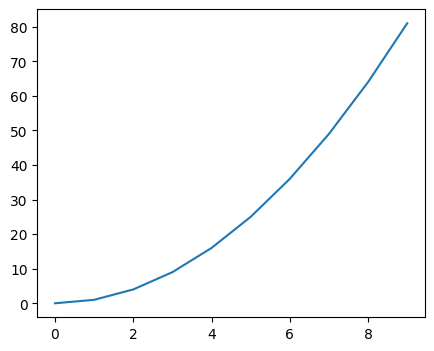

In [19]:
# 1D plots
x = np.arange(10)
y = x**2
plt.figure(figsize=(5, 4))
plt.plot(x, y)
plt.show()

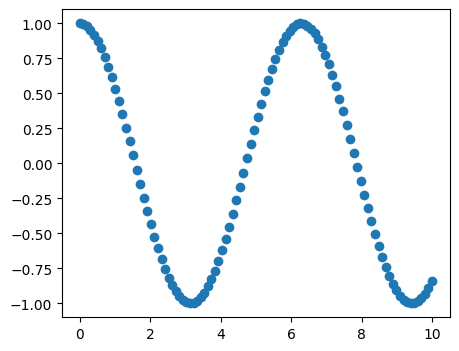

In [20]:
# 1D scatter plots
x = np.linspace(0, 10, 100)
y = np.cos(x)
plt.figure(figsize=(5, 4))
plt.scatter(x, y)
plt.show()

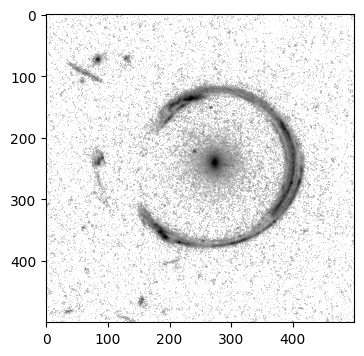

In [21]:
# 2D plots

from matplotlib.colors import LogNorm  # apply a logarithm stretch to the image

plt.figure(figsize=(4, 4))
plt.imshow(image_stored, norm=LogNorm(1e-3, 1e-1), cmap='gray_r')
plt.show()

## Manipulation of standard image files

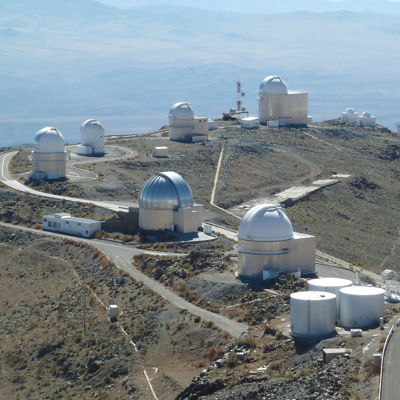

In [22]:
# open using the PIL library
im = Image.open(os.path.join(a_directory_name, "la_silla_big.jpg"))
im.thumbnail((400, 400))  # resize the image if too big
im

In [23]:
# extract pixels as a 3D RGB array
im_data = np.array(im)
print(im_data.shape)

(400, 400, 3)


## Jupyter / IPython notebooks

Actually, this is what is document is! Installing it with `conda` is easy: `conda install jupyter`. You then run the `jupyter notebook` command to start a "Jupyter server" in your browser, from which you can create a notebook.

*Notebooks* are interactive documents that facilitate the development of (simple) python analysis scripts. They come with additional tools such as [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html). For instance, the `%timeit` magic allows you to quickly test the runtime of a given python command.

WARNING: notebooks are awesome, but you have to be aware that all variables are shared among the notebook cells...which can sometimes lead to strange python error, hard to solve **Use unique variable names to prevent overwriting their values!**